# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were the most effective treatment methods with both drugs ending the study with an average tumor size of approximately 40 vs. a starting tumor size of 45. Interestingly, these drugs had the most data points leading to the possibility that these drugs had the largest impact due to having a longer treatment regimen indicated by the larger amount of data points.

- For the drugs chosen for further analysis, Capomulin, Ramicane, Infubinol, and Ceftamin, only one data point was considered an outlier providing confidence in the data set. In addition to this, the sex of the mouse was close to equally distributed with 51% male and 49% female leading to a low probability of sex impacting the data set.

- When analyzing data for a single mouse as a representation of the Capomulin treatment, there is a strong decline in tumor size over the course of the time points highlighting the effectiveness of the treatment.

- Finally, the last data point for tumor size in mice treated with Capomulin, the data point at the end of the treatment regimen, has a strong correlation coeffient of .84 indicating that the variability in the tumor size can be strongly explained by the weight of the mouse.
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
# Cheatsheet https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
mouse_data["Mouse ID"].nunique()

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# ChatGPT

duplicates = mouse_data[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
dup_mouse = duplicates["Mouse ID"].unique()
dup_mouse

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
# ChatGPT

invalid_data = mouse_data[mouse_data["Mouse ID"].isin(dup_mouse)]
invalid_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# ChatGPT

mouse = mouse_data[~mouse_data["Mouse ID"].isin(dup_mouse)]
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse["Mouse ID"].nunique()

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_mean = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_mean_df = pd.DataFrame({"Average Tumor Size": mouse_mean})
mouse_mean_df


,Average Tumor Size
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [33]:
mouse_median = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_median_df = pd.DataFrame({"Median Tumor Size": mouse_median})
mouse_median_df

,Median Tumor Size
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [34]:
mouse_var = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_var_df = pd.DataFrame({"Tumor Variance": mouse_var})
mouse_var_df

,Tumor Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [35]:
# Cheatsheet https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
mouse_dev = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_dev_df = pd.DataFrame({"Tumor Standard Deviation": mouse_dev})
mouse_dev_df

,Tumor Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [36]:
mouse_sem = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
mouse_sem_df = pd.DataFrame({"Tumor SEM": mouse_sem})
mouse_sem_df

,Tumor SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [37]:
mouse_summary = mouse_mean_df.merge(mouse_median_df, how="inner", on="Drug Regimen").merge(mouse_var_df, how="inner", on="Drug Regimen").merge(
    mouse_dev_df, how="inner", on="Drug Regimen").merge(mouse_sem_df, how="inner", on="Drug Regimen")
mouse_summary

,Average Tumor Size,Median Tumor Size,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# ChatGPT

agg_summary = mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index()
agg_summary

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

row_counts = mouse["Drug Regimen"].value_counts()
row_counts_df = pd.DataFrame(row_counts)
row_counts_df

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


<Axes: xlabel='Drug Regimen'>

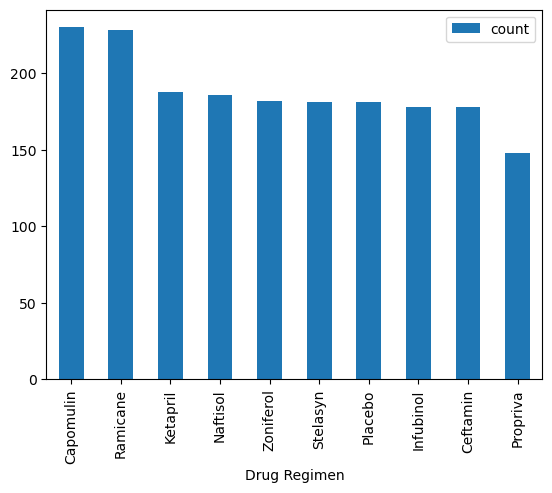

In [40]:
# Cheasheet https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

row_counts_df.plot.bar()


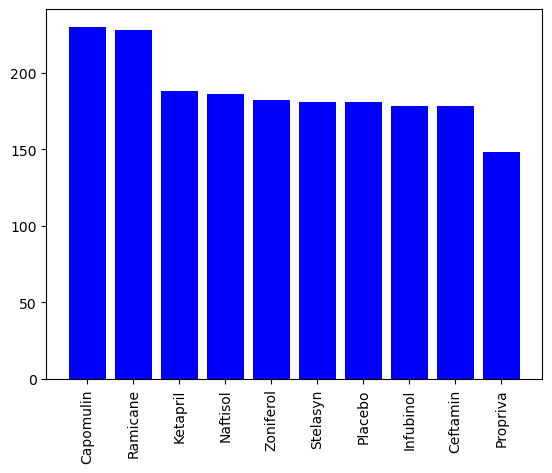

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# ChatGPT
new_row_counts_df = row_counts_df.reset_index()

x_axis = new_row_counts_df["Drug Regimen"]
y_axis = new_row_counts_df["count"]

plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.show()

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = mouse["Sex"].value_counts()
gender_counts_df = pd.DataFrame(gender_counts)
gender_counts_df


,count
Sex,
Male,958
Female,922


<Axes: ylabel='count'>

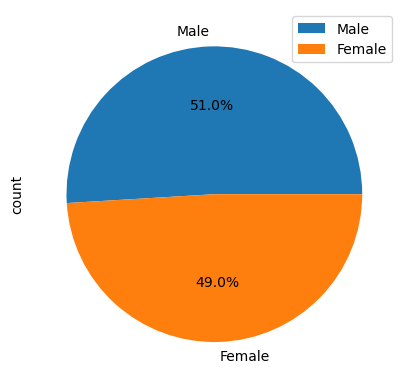

In [53]:
# ChatGPT
gender_counts_df.plot(kind="pie", y="count", autopct="%1.1f%%")

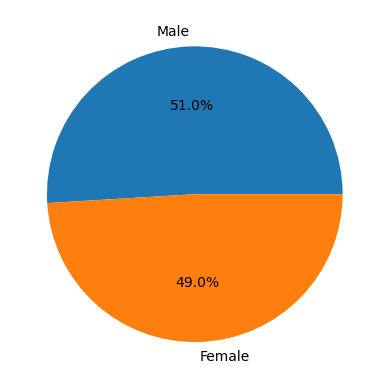

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
new_gender_counts_df = gender_counts_df.reset_index()
new_gender_counts_df.rename(columns={"Count": "Sex"}, inplace=True)

count = new_gender_counts_df["count"]
labels = new_gender_counts_df["Sex"]


plt.pie(count, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [172]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Class Review
#ChatGPT

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", ]

# Use the isin() method to filter the DataFrame
mouse_new = mouse[mouse["Drug Regimen"].isin(treatment)]

# Start by getting the last (greatest) timepoint for each mouse
mouse_max = mouse_new.groupby("Mouse ID")["Timepoint"].max()
mouse_max_df = pd.DataFrame(mouse_max)
mouse_max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_final = mouse_max_df.merge(mouse_new, how="inner", on=["Mouse ID", "Timepoint"])
mouse_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [223]:
# Put treatments into a list for for loop (and later for plot labels)
# Class Review
# ChatGPT


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
outlier_info = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size = mouse_final.loc[mouse_final["Drug Regimen"]==i, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_list.append(tumor_size)  

    # Determine outliers using upper and lower bounds

    quartiles = tumor_size.quantile([.25, .5, .75])

    iqr = quartiles[.75] - quartiles[.25]
    lower = quartiles[.25] - (1.5*iqr)
    upper = quartiles[.75] +(1.5*iqr)


    outliers = tumor_size.loc[(tumor_size > upper) | (tumor_size < lower)]
    treatment_info = {
        "Treatment": i,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outliers": list(outliers)}

    outlier_info.append(treatment_info)

outlier_info


[{'Treatment': 'Capomulin',
  'Lower Bound': 20.70456164999999,
  'Upper Bound': 51.83201549,
  'Outliers': []},
 {'Treatment': 'Ramicane',
  'Lower Bound': 17.912664470000003,
  'Upper Bound': 54.30681135,
  'Outliers': []},
 {'Treatment': 'Infubinol',
  'Lower Bound': 36.83290494999999,
  'Upper Bound': 82.74144559000001,
  'Outliers': [36.3213458]},
 {'Treatment': 'Ceftamin',
  'Lower Bound': 25.355449580000002,
  'Upper Bound': 87.66645829999999,
  'Outliers': []}]

Text(0, 0.5, 'Tumor Volume')

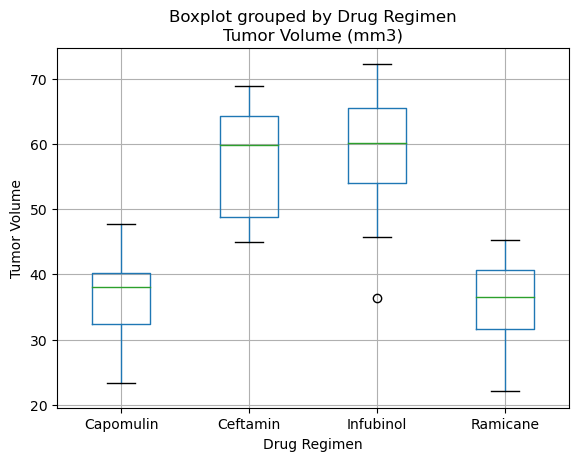

In [224]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# ChatGPT
mouse_final.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.ylabel('Tumor Volume')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

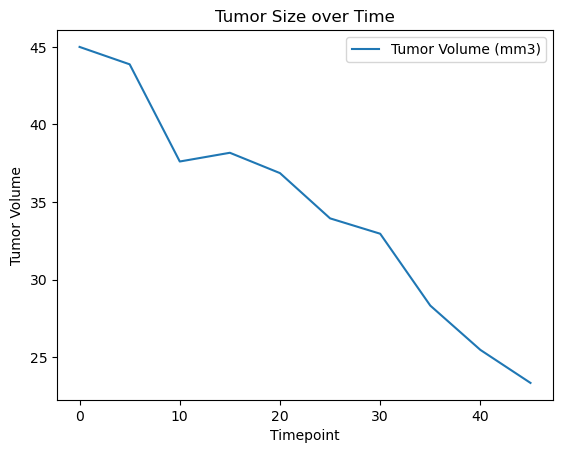

In [189]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Class Review

cap = mouse[mouse["Drug Regimen"] == "Capomulin"]
m = cap[cap["Mouse ID"] == "s185"]
m.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Tumor Size over Time")
plt.ylabel('Tumor Volume')

Text(0.5, 1.0, 'Weight vs. Tumor Size')

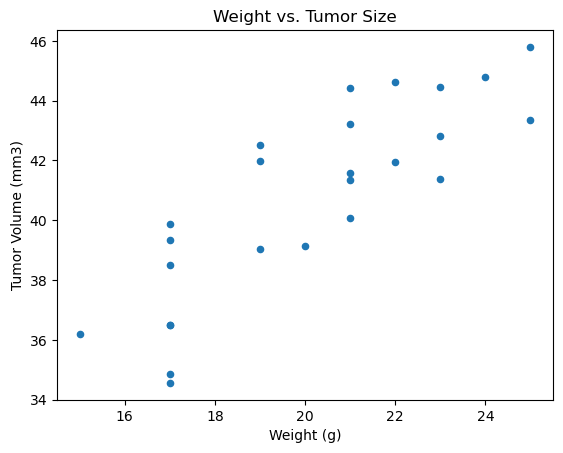

In [200]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Class Review
# ChatGPT

cap = mouse[mouse["Drug Regimen"] == "Capomulin"]
avg_tumor = cap.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
avg_tumor.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Size")

## Correlation and Regression

In [226]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Class Review
# ChatGPT

regression = st.linregress(avg_tumor["Weight (g)"], avg_tumor["Tumor Volume (mm3)"])
regression.rvalue


0.8419363424694721

Text(20, 37, 'Correlation Coefficient is 0.84')

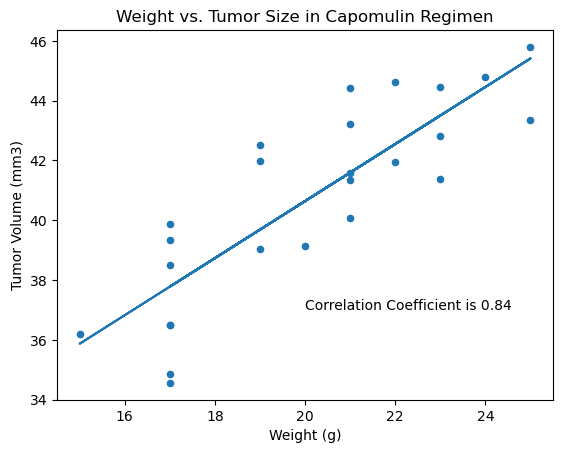

In [222]:
# Class Review
# ChatGPT

avg_tumor.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
slope = regression.slope
intercept = regression.intercept
regression_line = slope * avg_tumor["Weight (g)"] + intercept
corr = round(regression.rvalue,2)
plt.plot(avg_tumor["Weight (g)"], regression_line)
plt.title("Weight vs. Tumor Size in Capomulin Regimen")
plt.annotate("Correlation Coefficient is " + str(corr), xy=(20, 37))